### Data Analysis for CSI frame data

This notebook constructs some visualisations of the CSV data obtained from the raw CSI data

In [1]:
import pandas as pd
import numpy as np
import cmath

In [2]:
df = pd.read_csv('anechoic_chamber_data.csv')
df = df.drop(['Frame ID'],axis=1)

In [3]:
df.head()

,csi_1real,csi_1imag,csi_2real,csi_2imag,csi_3real,csi_3imag,csi_4real,csi_4imag,csi_5real,csi_5imag,...,csi_125real,csi_125imag,csi_126real,csi_126imag,csi_127real,csi_127imag,csi_128real,csi_128imag,channel,distance
0,124,-64,7,0,17,12,17,11,16,10,...,35,23,34,23,33,25,32,26,11,250
1,30,-32,1,0,-8,21,-7,21,-7,21,...,39,-25,38,-24,38,-22,38,-21,11,250
2,30,-32,1,0,21,11,21,10,22,9,...,39,30,39,29,39,29,39,29,11,250
3,116,64,7,0,-18,12,-18,12,-16,12,...,29,-33,30,-32,31,-30,30,-29,11,250
4,82,32,5,0,6,22,7,22,7,21,...,46,8,45,9,44,1,0,42,11,250


In [4]:
col_list = []
for i in range(1,129):#Subcarrier number
    colname1 = "csi_"+str(i)+"amp"
    colname2 = "csi_"+str(i)+"phase"
    col_list.append(colname1)
    col_list.append(colname2)
        
col_list.append('channel')
col_list.append('distance')

In [5]:
#col_list

In [6]:
df1 = pd.DataFrame(columns=col_list)

In [7]:
for index, row in df.iterrows():
    row_list = []
    for i in range(0,256,2):
        num = cmath.polar(complex(row[i],row[i+1]))
        row_list.append(num[0])
        row_list.append(num[1])
    row_list.append(row[256]) #Channel
    row_list.append(row[257]) 
    #print(len(row_list))
    df1.loc[len(df1)] = row_list
    

In [8]:
df1.columns

Index(['csi_1amp', 'csi_1phase', 'csi_2amp', 'csi_2phase', 'csi_3amp',
       'csi_3phase', 'csi_4amp', 'csi_4phase', 'csi_5amp', 'csi_5phase',
       ...
       'csi_125amp', 'csi_125phase', 'csi_126amp', 'csi_126phase',
       'csi_127amp', 'csi_127phase', 'csi_128amp', 'csi_128phase', 'channel',
       'distance'],
      dtype='object', length=258)

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


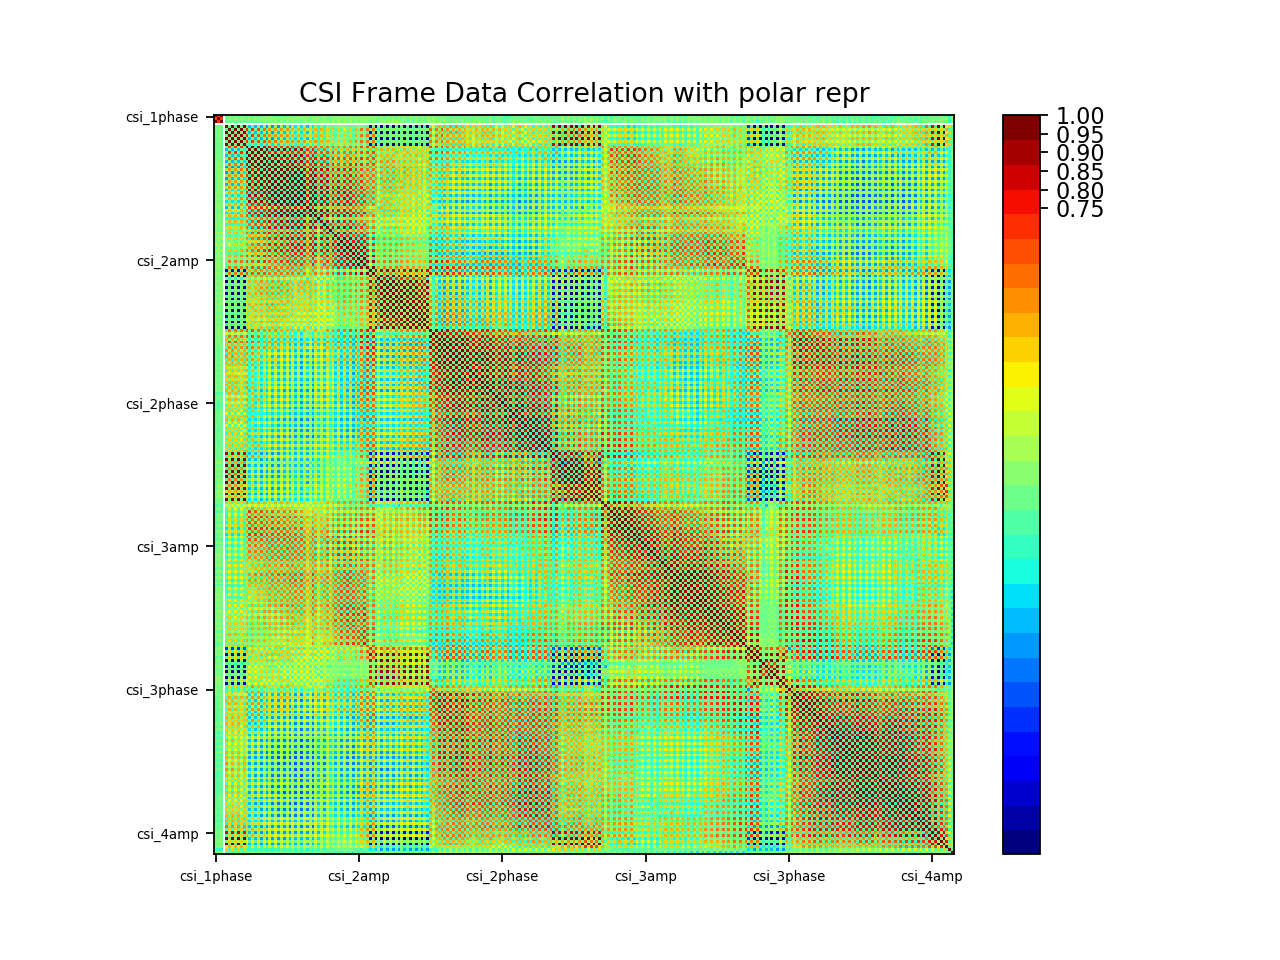

In [10]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    #ax1.grid(True)
    plt.title('CSI Frame Data Correlation with polar repr')
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()
    
correlation_matrix(df1)

TODO next:
1. Some subcarriers peak in certain channels. Visualise the amplitude of each subcarrier in each channel.
2. Apply classification on this data and see accuracy
3. Apply unsupervised learning techniques
4. Apply dimensionality reduction techniques as well
5. Process real life classroom data as well

In [11]:
df1.to_csv('anechoic_chamber_polar.csv')